
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [0]:
import keras
from keras.datasets import mnist 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy


Using TensorFlow backend.


In [0]:
#  第一步：載入資料並做資料分割
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


11493376/11490434 [==============================] - 16s 1us/step


In [0]:
# 第二步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

# 第三步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

# 輸出模型摘要資訊
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dens

In [0]:
# 第四步：編譯, 
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
# 第五步：訓練, 修正 model 參數
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size= [512,1024]
epochs = [10,20]

history_assembly =[]
for batch in batch_size:
    for epoch in epochs:
        print(f'\n ecochs= {epoch} , batch_size= {batch} \n')
        history = model.fit(X_train,Y_train,batch_size = batch, epochs=epoch, shuffle=True,verbose=2,validation_split=0.3 )
        history_assembly.append(history)
        history = []    


 ecochs= 10 , batch_size= 512 

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 4s - loss: 2.9075 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 2/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 3/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 4/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 5/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 6/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 7/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 8/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 9/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182
Epoch 10/10
 - 1s - loss: 2.9172 - acc: 0.8180 - val_loss: 2.9145 - val_acc: 0.8182

 ecochs= 20 , batch_size= 512 

Train

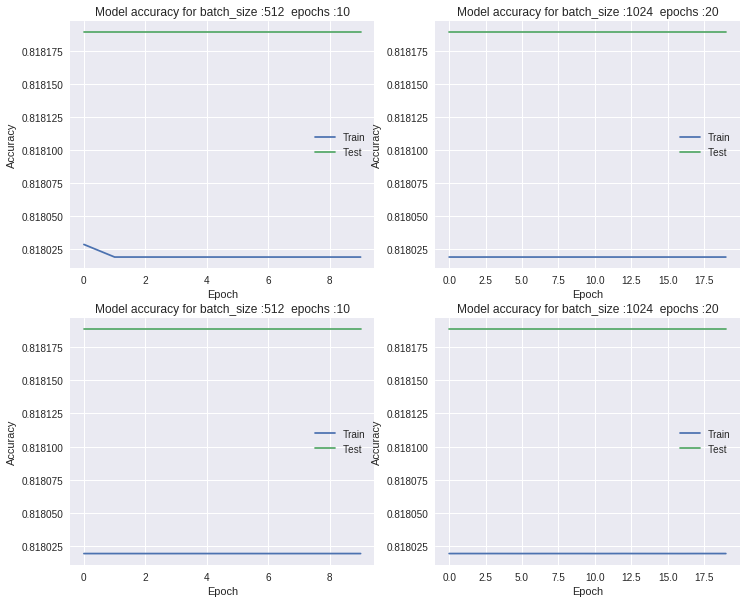

In [0]:
# 第六步：輸出

import matplotlib.pyplot as plt

%matplotlib inline

# Plot training & validation accuracy values
plt.figure(figsize=(12,10))

for i in range(len(history_assembly)):
    plt.subplot(2,2,i+1)
    j = i % 2
    plt.plot(history_assembly[i].history['acc'])
    plt.plot(history_assembly[i].history['val_acc'])
    plt.title('Model accuracy for ' + 'batch_size :'+ str(batch_size[j]) +'  epochs :' + str(epochs[j]))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    
   
plt.show()

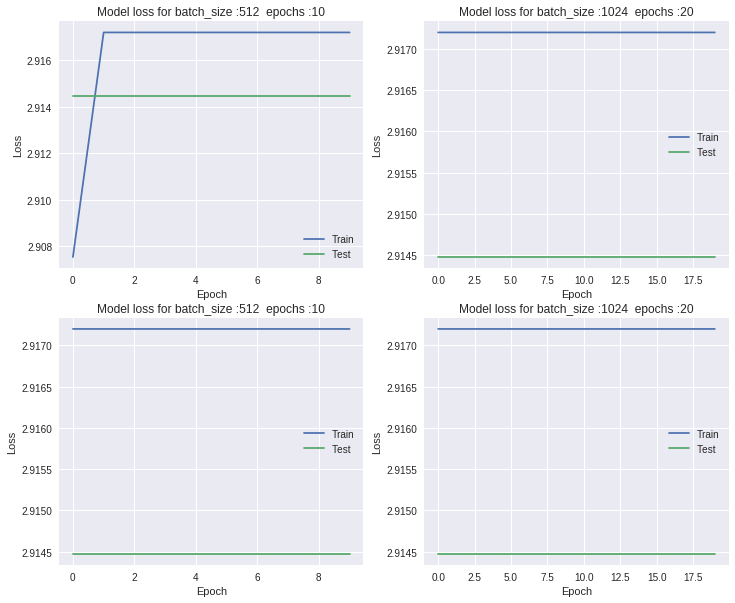

In [0]:
# Plot training & validation loss values
plt.figure(figsize=(12,10))

for i in range(len(history_assembly)):
    plt.subplot(2,2,i+1)
    j = i % 2
    plt.plot(history_assembly[i].history['loss'])
    plt.plot(history_assembly[i].history['val_loss'])
    plt.title('Model loss for ' + 'batch_size :'+ str(batch_size[j]) +'  epochs :' + str(epochs[j]))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
plt.show()

## 作業二  以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [0]:
def plot_output(history):
    plt.figure(figsize=(8,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
         
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [0]:
def fit_model(model,opt):
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train,Y_train,batch_size = 512, epochs=20, shuffle=True,verbose=2,validation_split=0.3 )
    return history

In [0]:
model = Sequential()

model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 1s - loss: 2.1891 - acc: 0.8462 - val_loss: 1.1233 - val_acc: 0.8945
Epoch 2/20
 - 1s - loss: 0.2558 - acc: 0.9638 - val_loss: 0.1470 - val_acc: 0.9750
Epoch 3/20
 - 1s - loss: 0.1068 - acc: 0.9805 - val_loss: 0.1465 - val_acc: 0.9736
Epoch 4/20
 - 1s - loss: 0.0734 - acc: 0.9853 - val_loss: 0.1398 - val_acc: 0.9750
Epoch 5/20
 - 1s - loss: 0.0549 - acc: 0.9883 - val_loss: 0.1622 - val_acc: 0.9717
Epoch 6/20
 - 1s - loss: 0.0422 - acc: 0.9907 - val_loss: 0.0836 - val_acc: 0.9829
Epoch 7/20
 - 1s - loss: 0.0320 - acc: 0.9929 - val_loss: 0.0817 - val_acc: 0.9837
Epoch 8/20
 - 1s - loss: 0.0260 - acc: 0.9944 - val_loss: 0.2428 - val_acc: 0.9642
Epoch 9/20
 - 1s - loss: 0.0265 - acc: 0.9941 - val_loss: 0.1041 - val_acc: 0.9805
Epoch 10/20
 - 1s - loss: 0.0203 - acc: 0.9957 - val_loss: 0.0738 - val_acc: 0.9848
Epoch 11/20
 - 1s - loss: 0.0163 - acc: 0.9969 - val_loss: 0.0727 - val_acc: 0.9854
Epoch 12/20
 - 1s - loss: 0.0142 - 

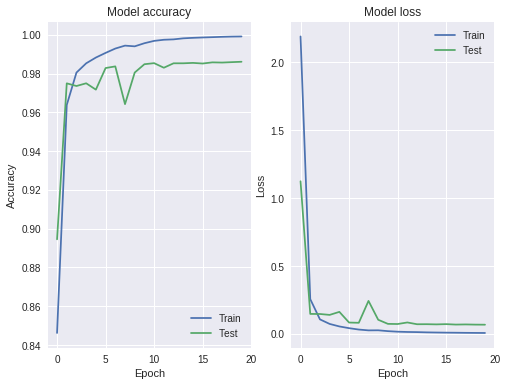

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 1s - loss: 0.6394 - acc: 0.9329 - val_loss: 0.0565 - val_acc: 0.9823
Epoch 2/20
 - 1s - loss: 0.0319 - acc: 0.9895 - val_loss: 0.0289 - val_acc: 0.9907
Epoch 3/20
 - 1s - loss: 0.0133 - acc: 0.9957 - val_loss: 0.0281 - val_acc: 0.9915
Epoch 4/20
 - 1s - loss: 0.0087 - acc: 0.9970 - val_loss: 0.0281 - val_acc: 0.9915
Epoch 5/20
 - 1s - loss: 0.0078 - acc: 0.9974 - val_loss: 0.0291 - val_acc: 0.9917
Epoch 6/20
 - 1s - loss: 0.0137 - acc: 0.9957 - val_loss: 0.0323 - val_acc: 0.9917
Epoch 7/20
 - 1s - loss: 0.0128 - acc: 0.9959 - val_loss: 0.0276 - val_acc: 0.9922
Epoch 8/20
 - 1s - loss: 0.0111 - acc: 0.9964 - val_loss: 0.0294 - val_acc: 0.9928
Epoch 9/20
 - 1s - loss: 0.0068 - acc: 0.9977 - val_loss: 0.0293 - val_acc: 0.9930
Epoch 10/20
 - 1s - loss: 0.0037 - acc: 0.9988 - val_loss: 0.0281 - val_acc: 0.9938
Epoch 11/20
 - 1s - loss: 0.0023 - acc: 0.9992 - val_loss: 0.0282 - val_acc: 0.9936
Epoch 12/20
 - 1s - loss: 0.0014 - 

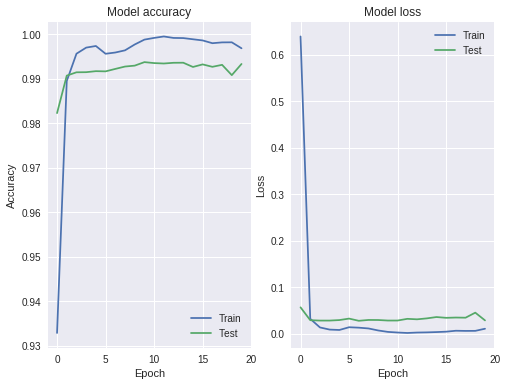

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 1s - loss: 0.0365 - acc: 0.9940 - val_loss: 0.0441 - val_acc: 0.9911
Epoch 2/20
 - 1s - loss: 0.0153 - acc: 0.9963 - val_loss: 0.0377 - val_acc: 0.9926
Epoch 3/20
 - 1s - loss: 0.0124 - acc: 0.9969 - val_loss: 0.0320 - val_acc: 0.9935
Epoch 4/20
 - 1s - loss: 0.0100 - acc: 0.9975 - val_loss: 0.0396 - val_acc: 0.9937
Epoch 5/20
 - 1s - loss: 0.0094 - acc: 0.9977 - val_loss: 0.0338 - val_acc: 0.9941
Epoch 6/20
 - 1s - loss: 0.0104 - acc: 0.9977 - val_loss: 0.0430 - val_acc: 0.9927
Epoch 7/20
 - 1s - loss: 0.0097 - acc: 0.9978 - val_loss: 0.0340 - val_acc: 0.9942
Epoch 8/20
 - 1s - loss: 0.0086 - acc: 0.9980 - val_loss: 0.0352 - val_acc: 0.9942
Epoch 9/20
 - 1s - loss: 0.0077 - acc: 0.9983 - val_loss: 0.0621 - val_acc: 0.9916
Epoch 10/20
 - 1s - loss: 0.0091 - acc: 0.9980 - val_loss: 0.0518 - val_acc: 0.9919
Epoch 11/20
 - 1s - loss: 0.0082 - acc: 0.9983 - val_loss: 0.0395 - val_acc: 0.9941
Epoch 12/20
 - 1s - loss: 0.0082 - 

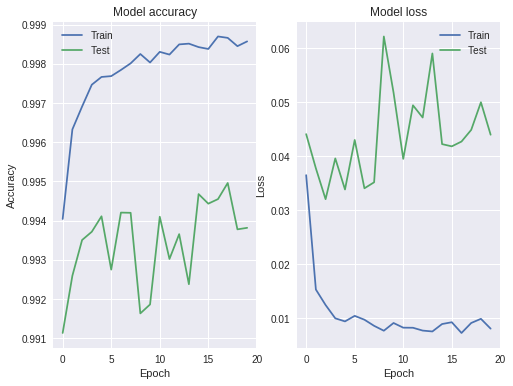

In [0]:
opts=['SGD','Adam','Rmsprop']

for opt in opts:
    history = fit_model(model,opt)
    plot_output(history)